In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

import urllib.request  # download from url


# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment.

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# ***Important!!!***

If some issues occur in running the code, figures could be seen [here](https://nbviewer.org/github/Davide011/Social_Graph/blob/main/Assignment1_colab.ipynb) .

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you.
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution
* Binning and plotting degree distributions.
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Let's Bin real numbers:

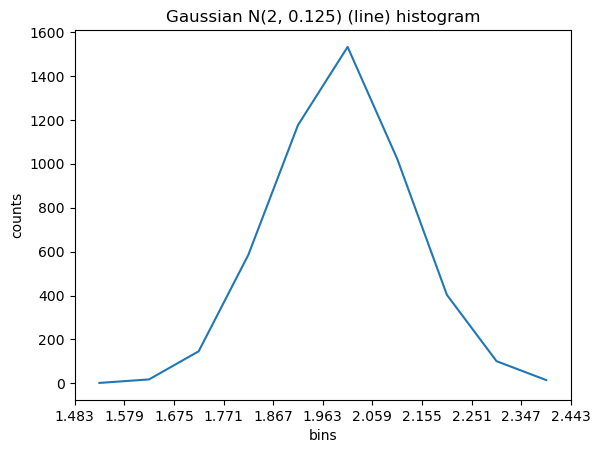

In [2]:
# Binning Real Numbers
nums = [random.gauss(2, 0.125) for _ in range(5000)]
count, bin_edges = np.histogram(nums, 10)
#we deal with the edge-count mismatch by setting each bin to the value in the middle of each bound/bin.
bin_centres = [(a+b)/2 for a,b in zip(bin_edges[:-1],bin_edges[1:])]
plt.plot(bin_centres, count)
#we can still use the actual edges in the plot for accuracy
edges = [round(edge, 3) for edge in bin_edges]
plt.xticks(edges)
plt.xlabel('bins')
plt.ylabel('counts')
plt.title('Gaussian N(2, 0.125) (line) histogram')
plt.show()

**Figure 1.1:** Histogram of 5000 values polled from a Normal distribution - N(2, 0.125)

**What does the numpy.histogram function return? Do the two arrays have the same length?**  
The np.histogram function returns 2 arrays, the first one is the count of elements in each histogram bin and the second one is the edges to the bins used. They don't have the same lenght, because we need one more edge than the number of bins to define them.  

**You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**  
We solved this issue when using the plt.plot() function by calculating the bin middle values and using them as x-coordinates. This way we have a single value to represent each bin (even if the exact value is not present in the bin). To make the line graph a bit more accurate, we still used the edges for the x-axis labels.

Now let's bin integer values:

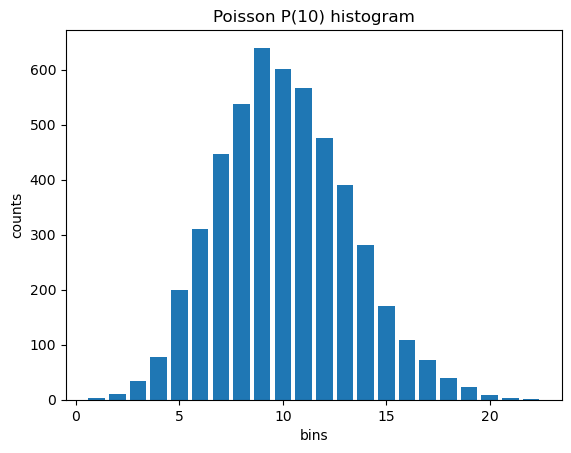

max value: 22, min value: 1
The sum of the counts is 5000, which is the number of values we polled from the poisson distribution and plotted into the histogram


In [3]:
# Binning Integers
nums = np.random.poisson(10, 5000)
#since we're using bin edges, we have to set them in between the int values.
bin_edge_list = [i-0.5 for i in range(nums.min(), nums.max()+2)]
counts, bin_edges = np.histogram(nums, bin_edge_list)
#We use the bin centres again for the plot
plt.bar(list(range(nums.min(), nums.max()+1)), counts)
plt.xlabel('bins')
plt.ylabel('counts')
plt.title('Poisson P(10) histogram')
plt.show()
print(f'max value: {nums.max()}, min value: {nums.min()}')
print(f'The sum of the counts is {sum(counts)}, which is the number of values we polled from the poisson distribution and plotted into the histogram')

**Figure 1.2:** Histogram of 5000 values polled from a Poisson distribution - P(10)

**Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**  
The first element of the vector (the first edge) is the minimum value-0.5, and the last one is the maximum value+0.5, while the step between elements/edges is 1. This makes each integer between min and max land into their own separate bin.

In [4]:
N = 5000
p = 10/(N-1)
ER = nx.erdos_renyi_graph(N, p)
degs = list(dict(ER.degree()).values())

**how do you find  p ?**  
$p=10/(N-1)$  
obtained from $\langle k \rangle = p (N-1)$

max degree: 24, min degree: 1


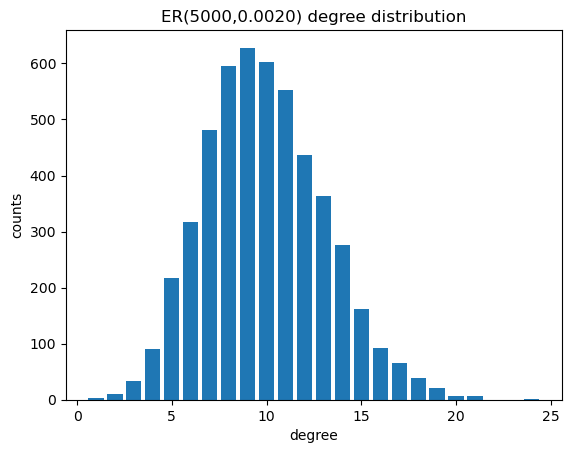

In [5]:
print(f'max degree: {max(degs)}, min degree: {min(degs)}')
#Calculate the bin edges so that the integers fall in the middle
bin_edge_list = [i-0.5 for i in range(min(degs), max(degs)+2)]
counts, bin_edges = np.histogram(degs, bin_edge_list)
#We use the bin centres again for the plot so bars align with xticks
plt.bar(list(range(min(degs), max(degs)+1)), counts)
plt.xlabel('degree')
plt.ylabel('counts')
plt.title(f'ER({N},{p:.4f}) degree distribution')
plt.show()

**Figure 1.3:** Histogram the degrees of an Erdos-Renyi graph with 5000 nodes and p=0.002

# Part 2: Random networks and plotting in `networkx`

* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

In the first part, we are going to work with a Erdos-Renyi Network and calculate some of its properties. The network has 3000 nodes (N = 3000) which have a 0.001 probability of being connected to each other (p = 0.001).

**a) What is the expected number of links, 〈L〉?**

To calculate this, we apply the number of links formula 〈L〉 = (pN * (N-1))/2.

$ 〈L〉 = (0.001 * 3000 * (3000-1)) / 2 = 4498 $


**b) In which regime is the network?**

To know in which regime the network is, we have to calculate the average degree of the network.

$〈k〉 = p(N-1) = 0.001*(3000-1) = 2,99$

Because the average degree is bigger than 1, we can say it is in the supercritical regime.

**c) Calculate the probability  $p_c$  so that the network is at the critical point**

$p_c = 1/N-1 = 1 / 2999 = 0.00033344$

To demonstrate the correctness of the result, we calculate again the average degree using this probability,
$〈k〉 = p(N-1) = 0.00033344*(3000-1) = 1$

When the network is at critical point, the average degree is 1, so we can see that the result is correct.

**d) Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.**

To have one component, we need the graph to be in a connected regime, which is defined by the following rule:

$〈k〉 = ln(N^{cr})$

We also know that:

$〈k〉 = p*(N^{cr}-1)$

We substitute:

$ln(N^{cr}) = p*(N^{cr}-1)$

$ln(N^{cr}) = 0.001*(N^{cr}-1)$

If we solve the equation, we get that:

$N^{cr} = 9199$

**e) For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**

$〈k^{cr}〉 = p * (N^{cr} - 1)$

$〈k^{cr}〉 = 0.001 * (9119 - 1)$

$〈k^{cr}〉 = 9.118$



$〈d〉 = ln(N^{cr}) / ln(〈k^{cr}〉) = ln(9119)/ln(9.118) = 4.125$

**f) Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).**

$p_k=e^{-〈k〉}\frac{〈k〉^k}{k!}=e^{-9.118}\frac{9.118^k}{k!}$

Demonstration using programming is done in the cell below.

In [6]:
#Probability distribution of node degrees
def p(k, avg_k):
    return np.exp(-avg_k)*(avg_k**k)/np.math.factorial(k)

In [7]:
# We generate the random network as described
G = nx.erdos_renyi_graph(3000, 0.001)
degs = list(dict(G.degree()).values())

max_degree = max(degs)
min_degree = min(degs)
avg_deg = np.mean(degs)
print(avg_deg)

#get all present degrees
all_degrees = list(range(max_degree))

# Calculate the degree distribution
distribution = [p(k,avg_deg) for k in all_degrees]

3.0553333333333335


C:\Users\david\AppData\Local\Temp\ipykernel_2480\2876430660.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-avg_k)*(avg_k**k)/np.math.factorial(k)


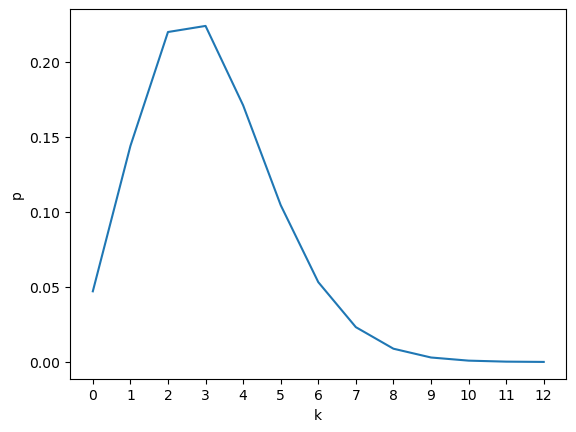

In [8]:
# And we plot the results!
plt.plot(all_degrees, distribution)

plt.xlabel("k")
plt.ylabel("p")
plt.xticks(all_degrees)

plt.show()

**Figure A2.1**: Poisson distribution of the degree distribution as discussed in question f)

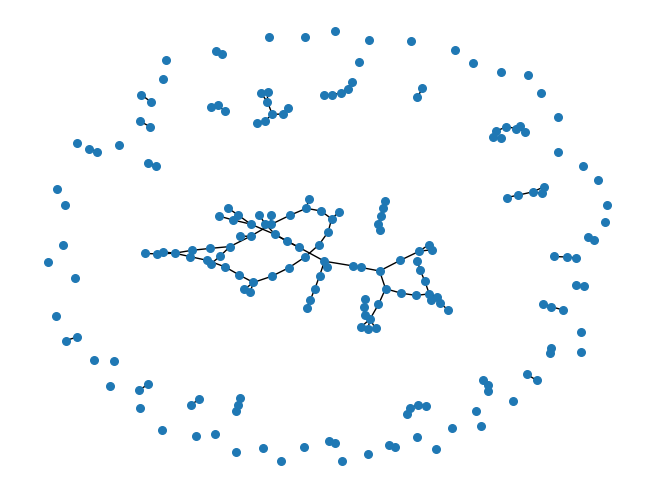

In [9]:
# Now we start with the part of the exercise that requires some code. The first thing we have to do is to create a random network with 200 nodes and an average degree of 1.5. We do this
# using the Networkx library and the function to generate Erdos-Renyi networks that it provides.

# The nx.erdos_renyi_graph function requires the probability that two nodes are connected to each other p. We get this value by resolving the equation 〈k〉 = p * (N-1)
# 1.5 = p * (200-1)
# p = 0.0075

G = nx.erdos_renyi_graph(200, 0.0075)
nx.draw(G, node_size=30)


**Figure A2.2**: Random Erdos-Renyi graph with 200 nodes, a probability of edge creation of 0.0075, and an average degree of 1.5



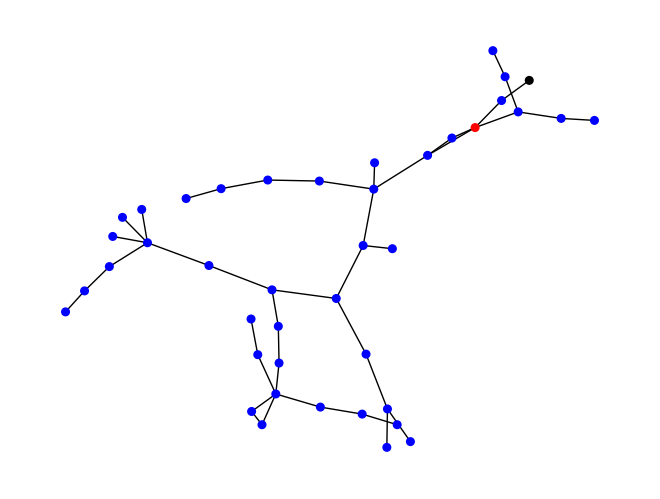

In [10]:
# Now we will keep using the methods provided by NetworkX to continue with the exercise. The first thing we have to do is get the biggest component of the graph. For that, we get all the components,
# and we retrieve the biggest one.

S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

max_value = 0
for graph in S:
  num_of_nodes = len(graph.nodes())
  if num_of_nodes > max_value:
    GCC = graph
    max_value = num_of_nodes

# Once we have it, we choose a random node using the random.choice method provided by Numpy

random_node = np.random.choice(GCC.nodes())

# Now we have to get the nodes that are at a distance of 2 from the random node we chose. Because the single_source_shortest_path_length function returns also the nodes that are a distance of 1 for example, we
# have to do some extra filtering afterwards to keep the ones that are at exactly 2 nodes of distance.
near_nodes = nx.single_source_shortest_path_length(GCC, random_node, 2)
near_nodes_numbers = []

for key, value in near_nodes.items():
    if value == 2:
        near_nodes_numbers.append(key)

# Before we plot the network, we have to construct the color map that we will use to paint the nodes. For that we iterate through all nodes and we check if it is a special node that should be colored and with what color.

color_map = []
for node in GCC:
    if node == random_node:
        color_map.append('black')
    elif node in near_nodes_numbers:
        color_map.append('red')
    else:
        color_map.append('blue')

# Now we are ready to plot!

nx.draw(GCC, node_color=color_map, pos=None, node_size=30)


**Figure A2.3**: GCC of random Erdos-Renyi graph with a random node painted black and the nodes at a distance of 2 painted in red.

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

The average shortest path is 62.875751503006015


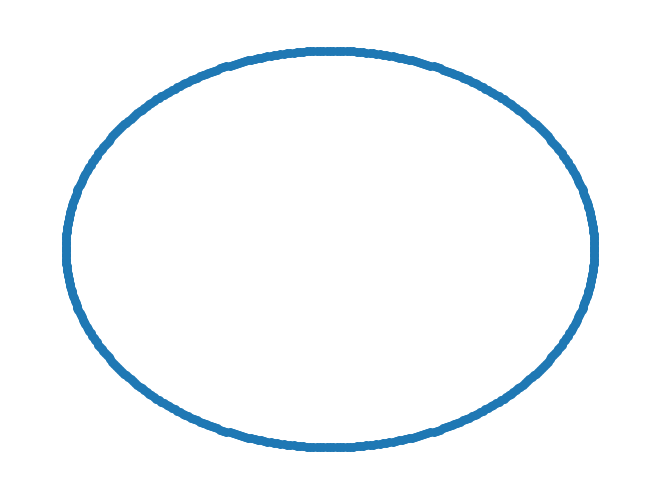

In [11]:
G = nx.watts_strogatz_graph(500, 4, 0)
nx.draw(G, pos=nx.circular_layout(G), node_size=30)
print("The average shortest path is " + str(nx.average_shortest_path_length(G)))

**Figure A3.1**  Watts-Strogatz graph with 500 nodes and a rewiring probability of 0.

The average shortest path is 7.580673346693387


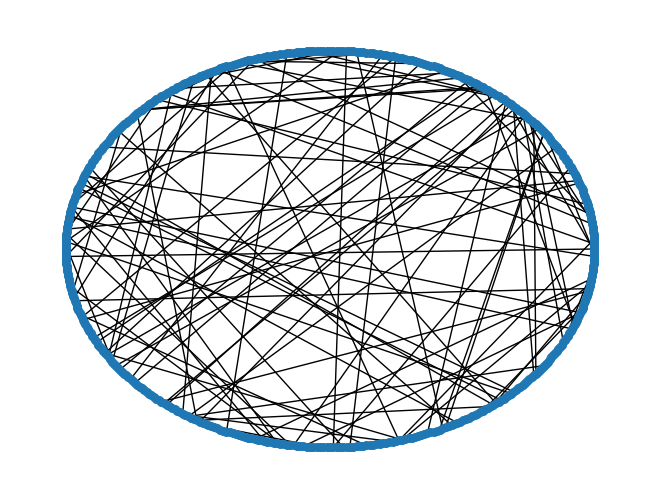

In [12]:
G = nx.watts_strogatz_graph(500, 4, 0.1)
nx.draw(G, pos=nx.circular_layout(G), node_size=30)
print("The average shortest path is " + str(nx.average_shortest_path_length(G)))

**Figure A3.2**: Watts-Strogatz graph with 500 nodes and a rewiring probability of 0.1

The average shortest path is 4.778028056112224


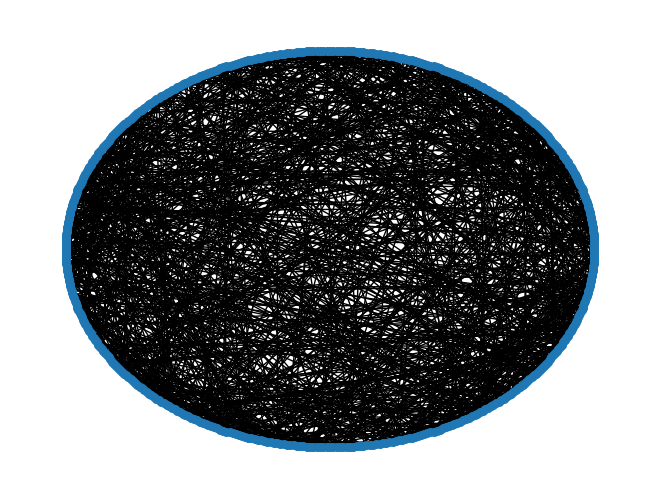

In [13]:
G = nx.watts_strogatz_graph(500, 4, 1)
nx.draw(G, pos=nx.circular_layout(G), node_size=30)
print("The average shortest path is " + str(nx.average_shortest_path_length(G)))

**Figure A3.3**: Watts-Strogatz graph with 500 nodes and a rewiring probability of 1, making it a random network.

The Watts-Stroggatz model starts as a network of circular shape in which each node is connected to its immediate and next neighbours. Afterwards, a rewiring probability will be applied to each edge, which defines the probability that the edge will be detached from one of its nodes and rewired into a random node.


This can be seen in the different pictures above. In figure A3.1 we have a rewiring probability of 0, which means that all edges stay the same connecting nodes that are neighbours. In the image it is seen poorly due to the number of nodes in the network, but if we decrease the number of nodes, we can see it better.

In Figure A3.2 we can see that a rewiring probability is applied and in fact some nodes are not connected to their neighbours anymore but to random nodes, creating edges that cross the circle.

In Figure A3.3 we can see a rewiring probability of 1, which transforms the network into a totally random network, because every edge is rewired.

The average shortest path is the average shortest path between any given nodes. We can see that the average shortest path decreases when the rewiring probability increases. In other words, it decreases when the network is more random. This is clear if we take a look at the figures. When the network is random, it's easier for a node to reach the node that is the most further from it. Instead, if there is no rewiring, a path has to go through half of the circle to connect the two furthest nodes.

In [14]:
p_vector = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

# These arrays will be used to plot the relationship between the rewiring probability and average shortest path.
average_d_vector = []
std_d_vector = []

for p in p_vector:
    shortest_path_array = []
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        shortest_path_array.append(nx.average_shortest_path_length(G))
    average_d = np.mean(shortest_path_array)
    deviation_d = np.std(shortest_path_array)
    average_d_vector.append(average_d)
    std_d_vector.append(deviation_d)
    print("Graphs with p: " + str(p))
    print("Average shortest path: " + str(average_d))
    print("Standard deviation: " + str(deviation_d))
    print("")

Graphs with p: 0
Average shortest path: 62.87575150300602
Standard deviation: 7.105427357601002e-15

Graphs with p: 0.01
Average shortest path: 24.532297394789577
Standard deviation: 4.649657719190712

Graphs with p: 0.03
Average shortest path: 13.26141082164329
Standard deviation: 1.3743448760943933

Graphs with p: 0.05
Average shortest path: 10.044351743486974
Standard deviation: 0.608454798002615

Graphs with p: 0.1
Average shortest path: 7.647397995991984
Standard deviation: 0.27091366386459925

Graphs with p: 0.2
Average shortest path: 6.103450581162325
Standard deviation: 0.11989720186711525



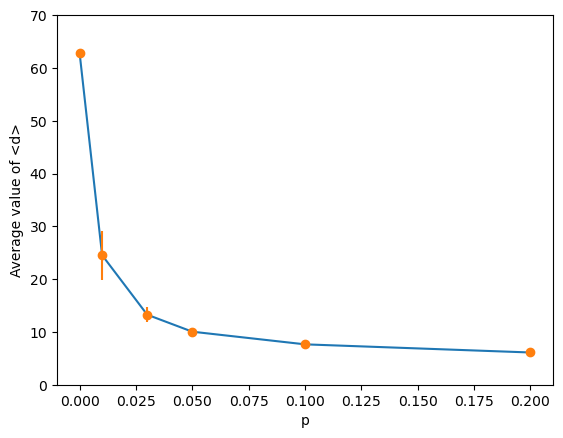

In [15]:
plt.plot(p_vector, average_d_vector)

# We use the standard deviation to add the errorbars to the plot.
plt.errorbar(p_vector, average_d_vector, yerr=std_d_vector, fmt='o')

plt.xlabel("p")
plt.ylabel("Average value of <d>")

plt.yticks(np.arange(0, 80, 10))

plt.show()

**Figure A3.4** Plot showing the relationship between average shortest path and rewiring probability .

In Figure A3.4 we can see what we explained before in this same exercise. We can see that the average shortest path decreases when the rewiring probability increases.

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

### Week 3 Barabasi-Albert model function

In [16]:
# function that flatten a list of tuples in a single list
def flatten_edgelist(graph):
    return list(sum(graph.edges, ()))


def B_Albert_model(n=100):
    """n= number o desired nodes"""

    g=nx.Graph()            # initialize graph
    g.add_nodes_from([1,2]) # add nodes (Not necessary,as edges add also not existing nodes, but it's more clear)
    g.add_edge(1,2)         # add edges

    for i in range(3,n+1):                # add nodes to reach 100-(desiderated number of nodes)
        edge_list = flatten_edgelist(g)   # list of all edges of graph g (=pairers of nodes)

        pick = random.choice(edge_list)   # pick a random node from the list

        g.add_edge(i, pick)                #add edge between the new node and the picked one

    print("G number of nodes: ", g.number_of_nodes())  # check if the number of nodes is correct
    return g                                            # return the graph


 Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [17]:
G_a_100 = B_Albert_model(100)  # graph created

G number of nodes:  100


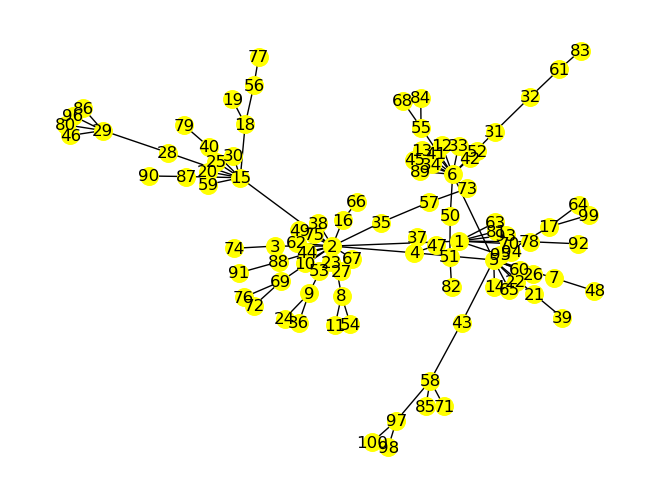

In [18]:
nx.draw(G_a_100, with_labels=True, node_color="yellow", node_size=160)  #plot

**Figure A4.1** <br>
Visual representation of the graph.

From the figure it could be noticed how the nodes 1 and 2 are hubs and one of the two is one of the biggest hub of the entire network. This depends from the construction of the Barabasi-Albert model, which attach new nodes with a higher probability to nodes with higher degree (= more connections; "hubs").
However, it has to be stated that as a probabilistic construction node 1 ot 2 has not to be on of the biggest hubs in absolute terms, even if it is quite probable to find it out to be hubs.




![my_version](https://github.com/Davide011/Social_Graph/blob/52cde5ef30609a73f6932cf00f21c2a2adc1bd2a/A_B_network.png)




* Now create a 5000 node network.
  * What's the maximum and minimum degree?  (see below)
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

In [19]:
G_a_5000 = B_Albert_model(5000)  # graph created

G number of nodes:  5000


To plot the distributions and calculate max min degree.

Create 2 functions that:  
* create a list with all the degree of the graph  
* calculate the occurencies for each degree (this cold be done with np.histogram too)


In [20]:
# list of the degrees in the network

def k_lista(graph):
    start_node = min(graph.nodes)  # start node of the network

    k_dict= graph.degree()      # dictionary of degrees in the network  ( node_i: degree node_i)
    k_list =[ k_dict[k] for k in range( start_node ,len(k_dict)+start_node)]  # list of degrees in the network
    #print("k_dict: ", k_dict ,"\n", len(k_dict))  #to check if some doubts
    #print("k_list: ", k_list,"\n", len(k_list))
    return k_list



# calculate the frequence of each degree in the network
def occurencies(list="list of degrees"):
    occurencies = {}   #initalize a dict
    for i in list:
        occurencies[i] = occurencies.get(i, 0) + 1   #get: if i in dict[i]= value;
                                                     #     if not  dict[i] = 0
    return occurencies     # retunr occurencied dict = {degree_1 : freq_1 , degree_2 :freq_2 ...}


In [21]:
# max, min degree in the network
list_degree_a5000= k_lista(G_a_5000)

max_degree_a5000 = max(list_degree_a5000)
min_degree_a5000 = min(list_degree_a5000)
print("max_degree: ", max_degree_a5000,"\n" ,"min_degree: ", min_degree_a5000)


max_degree:  126 
 min_degree:  1


###  Degree Distibution plots

In [22]:
# store degrees k and their occurencies in lists
list_degree_a5000    # list of degrees
k = occurencies(list_degree_a5000 ).keys()   # extract key(=degree) from occurency dict (function defined above)
freq = occurencies(list_degree_a5000 ).values()  # extract occurencies of degree


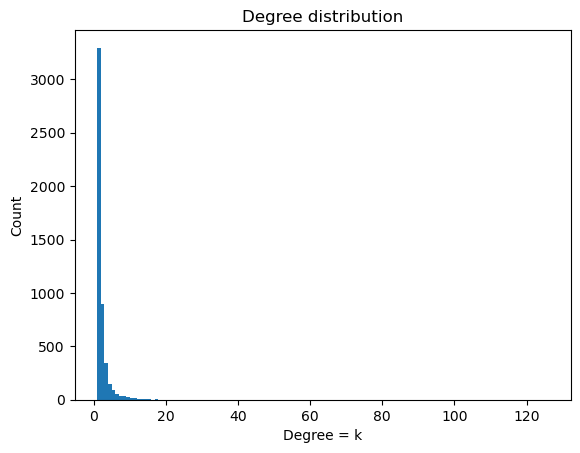

It could be noticed that in the hist plot some degree could not be seen as their count ~1 are not visible in 10^3 scale. I.e.: k= 126


In [23]:
#histogram occurencies of degree
wide = range(min(list_degree_a5000), max(list_degree_a5000)+1)
plt.hist(list_degree_a5000, bins=max_degree_a5000)   # np.histogram could be also used and pass the results to plot it
#KK, FF =np.histogram(list_degree_a5000 ,bins= max_degree_a5000, normed=None, weights=None, density=None)

plt.title("Degree distribution")
plt.xlabel("Degree = k")
plt.ylabel("Count")
plt.show()

print( "It could be noticed that in the hist plot some degree could not be seen as their count ~1 are not visible in 10^3 scale. I.e.: k=",np.max(np.array(list_degree_a5000) ) )



**Figure A4.2** <br>
Degree distribution histogram of the Barabasi-Albert network.

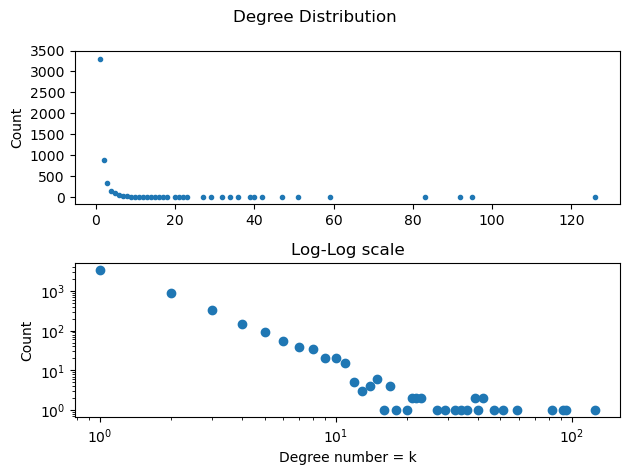

In [24]:
# 2 sublot
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Degree Distribution')


ax1.plot(k, freq, ".")
#ax1.set_xlabel('k')
ax1.set_ylabel('Count')
ax2.set_title("linear scale ")
ax1.set_xticks(np.arange(0, 130, 20))
ax1.set_yticks(np.arange(0, 4000, 500))

ax2.plot(k, freq, 'o')
ax2.set_xlabel('Degree number = k')
ax2.set_ylabel('Count')
ax2.set_title('Log-Log scale')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()

**Figure A4.3**  <br>
*In* the figure above the distibution of the degrees (degree vs degree count), and the distibution of the degree in a Log_log scale of the created Graph (5000 nodes, Barbaresi-Albert model) is shown.

* In the first plot it could be noticed a stringly non-inear behavior, that enhance the fact that very few nodes have a relly high degree (connections), and an extreme amount of nodes (~3500) have only one link. This behaviour is strictly linked to the model construction that enhance new nodes to connect with nodes with already higher degree.

* In the second Log-Log plot it could be noticed how the strong non-lineaar behavior which characterize the first plot in the range (0< K <15 ), becomes almost linear in a Logaritmich scale (power-law propriety).

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [25]:
# Generating the BA network like in week 3
G = nx.empty_graph(1)
G.add_node(1)
G.add_edge(0,1)
# List where each node appears as many times as edges it has
node_bag=[0,1]
# Add 98 Nodes
for i in range(2,100):
    G.add_node(i)
    connected_node = random.choice(node_bag)
    G.add_edge(i,connected_node)
    node_bag+=[i,connected_node]
# Uncomment to display the 100 node BA network
#nx.draw(G, node_size=75, edgecolors='#000000')
#plt.title('BA network')
# Add 4900 more nodes
for i in range(100,5000):
    G.add_node(i)
    connected_node = random.choice(node_bag)
    G.add_edge(i,connected_node)
    node_bag+=[i,connected_node]

Let's test the friendship paradox on a single random node:

In [26]:
#Friendship paradox:
def friendship_paradox(G):
    rand_node = random.choice(list(G.nodes()))
    #print(f'random node: {rand_node}')
    neighbors = list(dict(G.adj[rand_node]).keys())
    neighbor_degs = [len(G.adj[n]) for n in neighbors]
    avg_friend_deg = np.mean(neighbor_degs) if len(neighbor_degs) > 0 else 0

    return rand_node, len(neighbors), avg_friend_deg

# Run once:
node, num_friends, avg_friends_deg = friendship_paradox(G)
print(f'node {node} has {num_friends} friends, which in turn have an average of {avg_friends_deg} friends each :(')
print(f'So the paradox is {num_friends<avg_friends_deg} for this node')

node 4454 has 1 friends, which in turn have an average of 7.0 friends each :(
So the paradox is True for this node


And now, let's run it 1000 times to check the average case

In [27]:
# 1000 times on the BA network
count_valid = 0
runs = 1000
for i in range(runs):
    node, num_friends, avg_friends_deg = friendship_paradox(G)
    if avg_friends_deg > num_friends:
        count_valid += 1

print(f'On the BA network, he paradox was true {count_valid}/{runs} times')

On the BA network, he paradox was true 880/1000 times


Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

In [28]:
# Generate graph without preferential attatchment
GG = nx.empty_graph(1)
GG.add_node(1)
GG.add_edge(0,1)
# This is easier than converting the GG.nodes() to a list every time
nodes=[0,1]
for i in range(2,5000):
    GG.add_node(i)
    connected_node = random.choice(nodes)
    GG.add_edge(i,connected_node)
    nodes+=[i]

In [29]:
# Generate the ER graph with N edges
N = GG.number_of_nodes()
p = 2/(N-1)
ER = nx.erdos_renyi_graph(N,p)

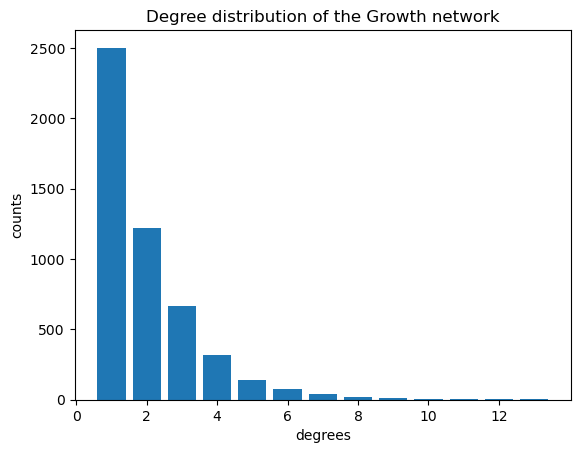

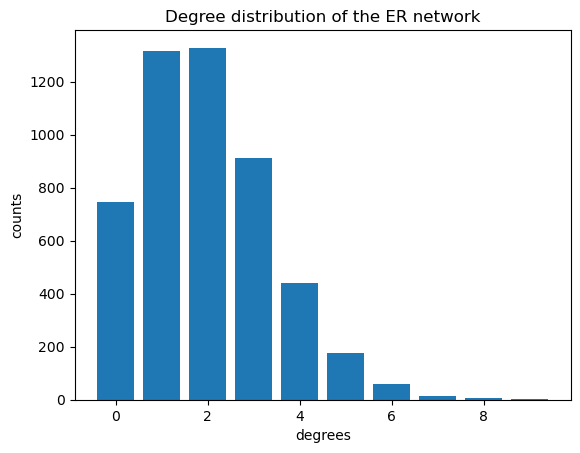

The Growth network has 4999 edges. Max degree 13 and min degree 1
The ER network has 4935 edges. Max degree 9 and min degree 0
The Growth network degree distribution has mean: 1.9996, and std: 1.411240532297737
The ER network degree distribution has mean: 1.974, and std: 1.4234198256312154


In [30]:
# Degree distribution of the BA network
degs = list(dict(GG.degree()).values())
max_deg = max(degs); min_deg = min(degs)
bin_edge_list = [i-0.5 for i in range(min_deg, max_deg+2)]
counts, bin_edges = np.histogram(degs, bin_edge_list)
plt.bar(list(range(min_deg,max_deg+1)), counts)
plt.xticks(np.arange(0,max_deg+1,2))
plt.title('Degree distribution of the Growth network')
plt.ylabel('counts')
plt.xlabel('degrees')
plt.show()

# Degree distribution of the ER network
er_degs = list(dict(ER.degree()).values())
max_er_deg = max(er_degs); min_er_deg = min(er_degs)
bin_edge_list = [i-0.5 for i in range(min_er_deg, max_er_deg+2)]
counts, bin_edges = np.histogram(er_degs, bin_edge_list)
plt.bar(list(range(min_er_deg,max_er_deg+1)), counts)
plt.title('Degree distribution of the ER network')
plt.ylabel('counts')
plt.xlabel('degrees')
plt.show()
print(f'The Growth network has {len(GG.edges())} edges. Max degree {max_deg} and min degree {min_deg}')
print(f'The ER network has {len(ER.edges())} edges. Max degree {max_er_deg} and min degree {min_er_deg}')

print(f'The Growth network degree distribution has mean: {np.mean(degs)}, and std: {np.std(degs)}')
print(f'The ER network degree distribution has mean: {np.mean(er_degs)}, and std: {np.std(er_degs)}')

**Figure 5.1:** Degree distributions of the ER and Growth networks respectively. Degrees with 0 counts have been discarded from the BA network for clarity.

The growth network has 1 connected components
The ER network has 886 connected components, where the first 5 have sizes: [3904, 8, 7, 7, 6]


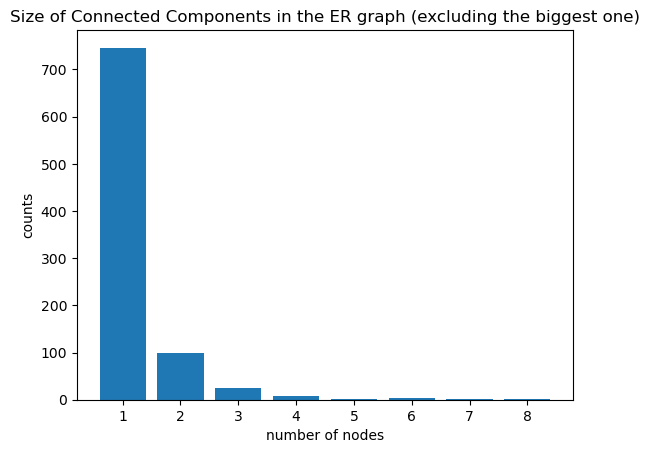

In [31]:
cc_GG = sorted(nx.connected_components(GG), key=len, reverse=True)
print(f'The growth network has {len(cc_GG)} connected components')

cc_ER = sorted(nx.connected_components(ER), key=len, reverse=True)
cc_sizes =[len(cc) for cc in cc_ER]
print(f'The ER network has {len(cc_ER)} connected components, where the first 5 have sizes: {cc_sizes[:5]}')
max_cc = max(cc_sizes[1:]); min_cc = min(cc_sizes)
bin_edge_list = [i-0.5 for i in range(min_cc, max_cc+2)]
counts, bin_edges = np.histogram(cc_sizes[1:], bin_edge_list)
plt.bar(list(range(min_cc,max_cc+1)), counts)
plt.title('Size of Connected Components in the ER graph (excluding the biggest one)')
plt.ylabel('counts')
plt.xlabel('number of nodes')
plt.show()

**Figure 5.2:** Distribution of the size of connected components in the ER network, excluding the biggest component for better scale.

**Q:** Compare to the ER network of same size and same  p . What are the differences? Explain in your own words.

**Answer:**  
The first subtle difference we can see is that the growth network has no nodes with degree 0, which is obvious because we add an edge to each new node. We can also see that even though we're not using preferential attatchment, the degree distribution still looks a bit closer to one with it than the random one (except with a shorter tail). This could be due to the 'accidental' preferential attatchment caused by earlier edges having higher chances to get edges.  

When we look at the number and sizes of connected components we see even bigger differences. The Growth network will always have a single connected component, which starts with the first two nodes, and all new ones will be connected to it with their edge. On the other hand, the ER network has one big connected component and a lot of smaller ones, specially disconnected nodes.

# Part 6 Configuration-model networks

 Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [32]:
# Already created in es before

#G_a_100 = B_Albert_model(100)  # graph created in es 4
G_a_100_degree_list= k_lista(G_a_100)  # list of degrees in the network

In [33]:
def configuration_model (degrees) :

    halfedges = [] # a list of halfedges

    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    ####################################################################
    # in this for cicle some errors with big arrays occurs!!!
    for i, k in enumerate(degrees):
        halfedges.extend([i]*k)
        #print(halfedges)
        #break
    # STEP ONE ENDS HERE
    #print("Check if the following ouput matches what you expect 'halfedges' to look like")
    #print(halfedges)
    ####################################################print("lennn1",len(halfedges))
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    np.random.shuffle(halfedges)
    ###print("Check if the following ouput matches what you expect 'halfedges' to look like")
    ####################################################print("lennn2",len(halfedges))
    # STEP TWO ENDS HERE
    # Append the resulting edges to the list `edgelist` as tuples
    # [that is, append (i,j) if i and j should be connected by and edge]
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.
    # STEP THREE GOES HERE..

    cicle=0
    #for j ,l  in enumerate(halfedges, 2):
    for j in range(0, len(halfedges), 2):
            l= halfedges[j]
            edgelist.append((l, halfedges[j+1]))
    # STEP THREE ENDS HERE
    #  print("Check if the following ouput matches what you expect 'edgelist' to look like", len(edgelist)) # here with a lot of nodes some errors occur!!!
    return edgelist #Return list of tuples indicating edges


* Extract the degree sequence for the 100-node Barabasi-Albermt network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).

In [34]:
degree= G_a_100_degree_list  # list of degrees in the 100-node Barabasi-Albermt network created before
#degree= [2,2,3,3]
G_configuration= configuration_model(degree)


* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

Firstly could be noticed that the Barbarasi network is a fully connected graph, instead the Configuration Network it is composed from multiple disconnected elements. Fhurtermore, the Barabasi-Albert model has a few nodes with as high degree and many nodes with a lower degree due to his is a scale-free free characteristic that follows a power-law distribution (as seen before).


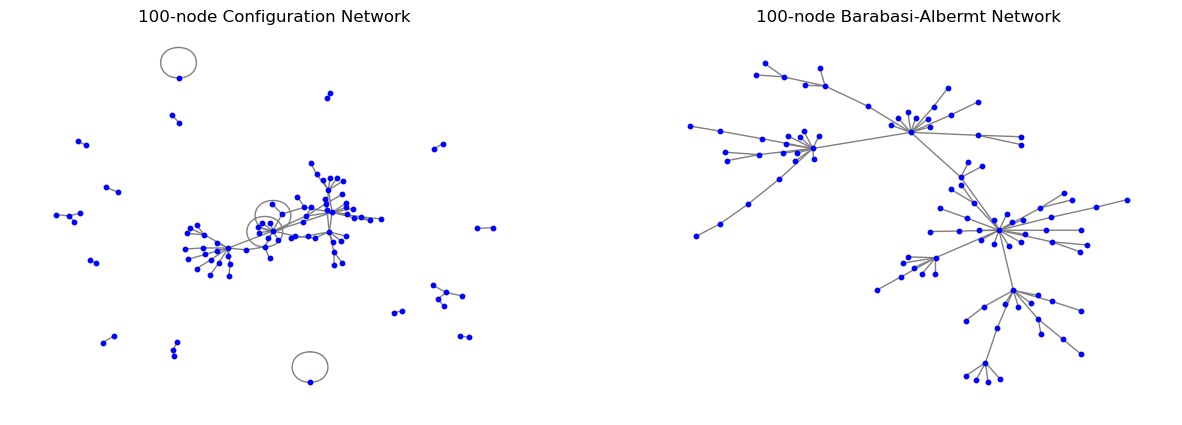

In [35]:
# subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot the 100-node Barabasi-Albermt network
nx.draw(G_a_100, ax=ax2, node_size=10, node_color="blue", edge_color="grey", with_labels=False)
ax2.set_title("100-node Barabasi-Albermt Network")

# plot the 100-node configuration network
G_configuration = nx.Graph(G_configuration)
nx.draw(G_configuration, ax=ax1, node_size=10, node_color="blue", edge_color="grey", with_labels=False)
ax1.set_title("100-node Configuration Network")
plt.tight_layout
plt.show()


**Figure A6.1**  <br>

The two networks have different characteristics:
the Configuration model is a random network, so the edges are randomly distributed, while the Barabasi-Albert model is a scale-free network.

A more complex implementation of the Configuration network function could be used in an effort to reduce the number of self loops (by giving priority to the other connections)
In addition, it has to be rememebered hat some (degree -- node) configurations, couldn't be implemented. (I.e. the most straightforward scenario with 2 nodes with 3 and 2 connections. Or the well-known "Königsberg Problem".)

From a mathematical point of view to have a fully connected graph  only the start and/or end node could have an odd number of links. In other words, some configurations could be done simply by creating more not connected hubs; others could simply  not be performed (I.e. All cases in which the sum of degrees is an odd number).

### Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

In [36]:
list_5000_3_4 =[3,5]*2500
G_configuration_5000= configuration_model(list_5000_3_4)
G_configuration_5000_nx = nx.Graph(G_configuration_5000)

* What should the sum of node degrees be if all nodes had degrees as described in the exercise?


In [37]:
# sum of all the degree passed at the configuration network construction fucntion
sum_5000_3_4 = sum(list_5000_3_4)# sum of all the degree input
print("Sum of degree passed at the configuartion network construction function: ", int(sum_5000_3_4) ,"\n")



Sum of degree passed at the configuartion network construction function:  20000 



* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [38]:
degree_G_configuration_5000= k_lista(G_configuration_5000_nx)  # list of degrees in the network
print("Sum of degree of the constructed configuration network: ",sum(degree_G_configuration_5000), "This shows if there are missing Degrees from the 20000 degrre sum put as input!" ,"\n")
print("Number of nodes of the constructed configuration network: ", len(degree_G_configuration_5000) ,". This show that there are not missing Nodes.","\n")

Sum of degree of the constructed configuration network:  19998 This shows if there are missing Degrees from the 20000 degrre sum put as input! 

Number of nodes of the constructed configuration network:  5000 . This show that there are not missing Nodes. 



As it could be noticed the input degree sum is different from the output seen in the created configuration network.
Let's analyse it but printing a list of the degree of the created network.

In [39]:
# degree_G_configuration_5000 list of degrees in the network
k_conf=occurencies(degree_G_configuration_5000).keys()   # degree
freq_conf=occurencies(degree_G_configuration_5000).values()  # occurencies of degree\
print(len(degree_G_configuration_5000))
print("Degree in the created config: ", k_conf, "\n", "Count per degree: ", freq_conf)


5000
Degree in the created config:  dict_keys([3, 5, 4]) 
 Count per degree:  dict_values([2500, 2498, 2])


In the cell before it could be noticed if there are anomalous degree value(different from 3;5) in the degree list and its count in the following count list.

Let's plot it !

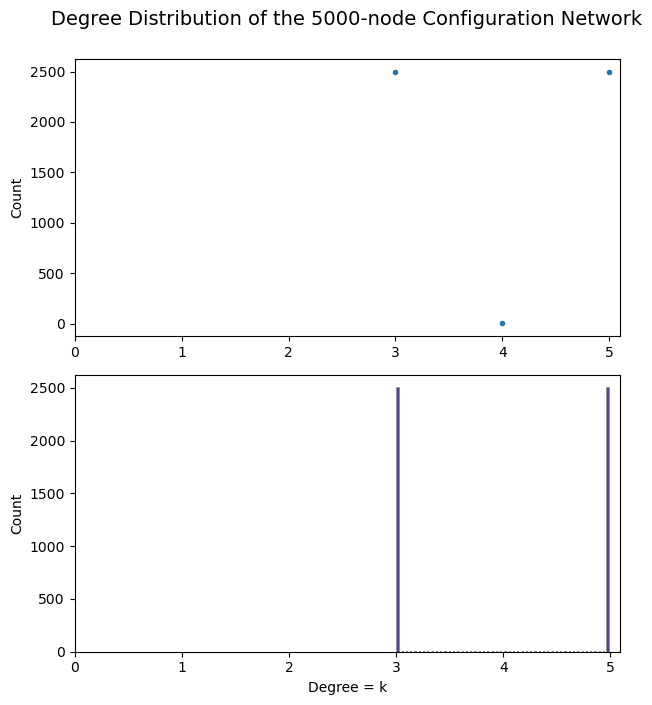

In [40]:
# 2 sublot
fig, (ax1, ax2) = plt.subplots(2,1)  # 2 rows, 1 column
fig.suptitle('Degree Distribution of the 5000-node Configuration Network' , fontsize=14 , y=1.0, x=0.55, ha="center")
# change dimension of the plot
fig.set_figheight(7)  # size of the plot
ax1.plot(k_conf, freq_conf, ".")
ax1.set_ylabel('Count')
ax1.set_xticks(np.arange(0, 6, 1))

ax2.hist(degree_G_configuration_5000, bins=50, color="blue", edgecolor="black", linewidth=1.2, alpha=0.5, rwidth=0.5 )
ax2.set_ylabel('Count')
ax2.set_xlabel('Degree = k')
ax2.set_xticks(np.arange(0, 6, 1))
plt.tight_layout()
plt.show()



**Figure A6.2**  <br>
The figure above shows the degree distribution of the 5000-node configuration network.
Two plots are reported to enhace the visualization as in the histogram due to scale issues some information concerning degree with count ~ $10^0$ would be lost.

The plots shows that (probably) there are some anomalous degree values different from the degree inputs (3,5).

* If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

The degree artefact analized before comes from a miss reading o self edges by "graph nx" implementation.

In fact, as can be seen in the additional TEST section that follows, auto-loops are correctly counted in the node degree (i.e., two degrees for one loop) if there is only one self-loop per node or less. If there are more than one self-loops per node, the additional self-loop degree will be treated as a duplicate of the first one, and the additional edges won't be included in the degree count.






### TEST
Redefining the Configuration model function to print the list of halfedges during the process.

In [41]:
def configuration_model_TEST (degrees) :

    halfedges = [] # a list of halfedges

    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    ####################################################################
    # in this for cicle some errors with big arrays occurs!!!
    for i, k in enumerate(degrees):
        halfedges.extend([i]*k)
        #print(halfedges)
        #break
    # STEP ONE ENDS HERE
    #print("Check if the following ouput matches what you expect 'halfedges' to look like")
    #print(halfedges)
    print("lennn1",len(halfedges))
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    np.random.shuffle(halfedges)
    ###print("Check if the following ouput matches what you expect 'halfedges' to look like")
    print("lennn2",len(halfedges))
    # STEP TWO ENDS HERE
    # Append the resulting edges to the list `edgelist` as tuples
    # [that is, append (i,j) if i and j should be connected by and edge]
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.
    # STEP THREE GOES HERE..

    cicle=0
    #for j ,l  in enumerate(halfedges, 2):
    for j in range(0, len(halfedges), 2):
            l= halfedges[j]
            edgelist.append((l, halfedges[j+1]))
    # STEP THREE ENDS HERE
    #  print("Check if the following ouput matches what you expect 'edgelist' to look like", len(edgelist)) # here with a lot of nodes some errors occur!!!
    return edgelist #Return list of tuples indicating edges

## Trying to understand how loop connections are considered in degree graph (section not needed)

In [42]:
#degreee= G_a_100_degree_list  # list of degrees in the 100-node Barabasi-Albermt network created before
# test with 3 auto loops , degree 6
ww= [6]  # degrees
G_configuration__1= configuration_model_TEST(ww)
G_configuration__1_nx = nx.Graph(G_configuration__1)

# test with one node and 1 auto loop = degree2
ww_2= [2] # degree 2 1 link
G_configuration__2= configuration_model_TEST(ww_2)
G_configuration__2_nx = nx.Graph(G_configuration__2)

lennn1 6
lennn2 6
lennn1 2
lennn2 2


degree with 3 loops (expected degree 6): [2] However, it could be seen that the node degree doesn't grow with the grow of self-links
degree with 1 loops (expected degree 2):  [2]


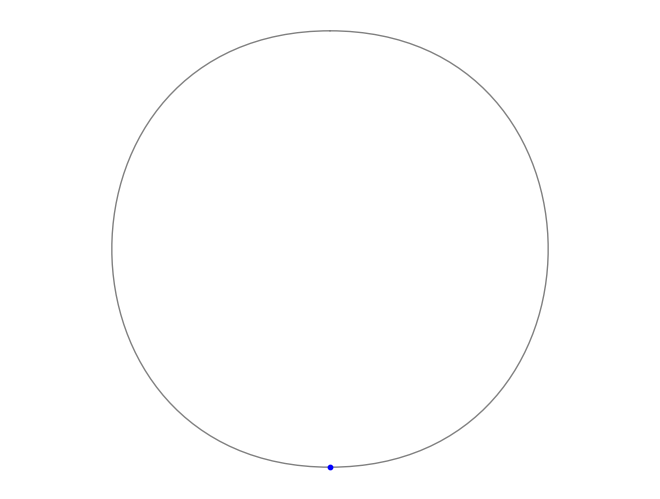

In [43]:
nx.draw(G_configuration__1_nx,  node_size=10, node_color="blue", edge_color="grey", with_labels=False)

print("degree with 3 loops (expected degree 6):", k_lista(G_configuration__1_nx),"However, it could be seen that the node degree doesn't grow with the grow of self-links")
print("degree with 1 loops (expected degree 2): ", k_lista(G_configuration__2_nx))


**Figure A6.2 .1**  <br>
Graph nx with 1 self loop.*testo in corsivo*

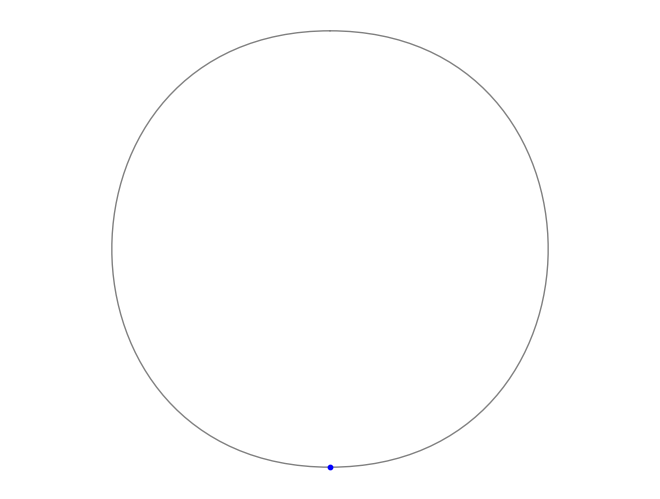

In [44]:
nx.draw(G_configuration__2_nx,  node_size=10, node_color="blue", edge_color="grey", with_labels=False)

**Figure A6.2 .2**  <br>
Graph nx with 6 self loops.